<a href="https://colab.research.google.com/github/OvieIboyitie/UDACITY-DATA-ANALYST/blob/main/wrangle_act.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OVIE IBOYTIE**

# Wrangle and Analyze data

### Import the required Libraries

In [1]:
#!pip install -U pandas-profiling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
#import os
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pandas_profiling

### Gathering the  data

In [3]:
# Loading the twitter archive enhanced data
archive_df  = pd.read_csv("https://raw.githubusercontent.com/OvieIboyitie/UDACITY-DATA-ANALYST/main/twitter-archive-enhanced.csv")


# Loading the image predictions data
image_predictions_df = pd.read_csv("https://raw.githubusercontent.com/OvieIboyitie/UDACITY-DATA-ANALYST/main/image-predictions.tsv", sep = "\t")

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [ ]:
twitter_list = []

# Read the twiiter json file into a list of dictionaries
for line in open('tweet-json.txt', 'r'):
    twitter_data = json.loads(line)
    twitter_list.append({'tweet_id': twitter_data['id_str'],
                        'retweet_count': twitter_data['retweet_count'],
                        'favorite_count': twitter_data['favorite_count'],
                        'followers_count': twitter_data['user']['followers_count']})
    

In [ ]:
# Convert the list of dictionaries into DataFrame
twitter_data = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])

In [4]:
twitter_data  = pd.read_csv("https://raw.githubusercontent.com/OvieIboyitie/UDACITY-DATA-ANALYST/main/Twitter%20API%20data.csv")

### Assessing the data

In [4]:
twitter_data.head(2)

tweet_id  retweet_count  favorite_count  followers_count
0  892420643555336193           8853           39467          3200889
1  892177421306343426           6514           33819          3200889

In [5]:
twitter_data.profile_report(title="Twitter Data Report", progress_bar = False)

**OBSERVATIONS 
FROM THE REPORT ABOVE**

1. There are no missing values
2. There are 2354 records and 4 variables (columns)
3. There are no duplicate rows

1. Twitter_id is in integer, IDs are suppose to be a string
2. The number of retweets ranges from 0-79515 and the data type is interger.
3. The favorite count ranges from 0-132810, with 179 0 favourite counts, the data type is integer
4. The followers counts are non zero positive values. The data type is integer and no missing values

### Twitter API (twitter data)
**QUALITY ISSUES**

- Wrong datatype (tweet_id)
- Missing tweets

**TIDINESS ISSUE**
- twitter api table columns(retweet_count, favorite_count, followers_count) should be added to twitter archive table.

In [6]:
#twitter_data.info()

In [7]:
image_predictions_df.profile_report(title="Image Predictions Report", progress_bar = False)

**OBSERVATIONS FROM THE REPORT ABOVE**
1. There are 12 variables and 2075 records. 
2. No missing values and no duplicated records

1. There are 2075 distinct tweet Ids and the data type is string as it should be
2. There are 3.2% duplicate jpg_urls, and no missing values
3. There are 4 categories of images. No missing values. The most common image category - "img_num" is 1 followed by 2
4. There are 378 distict categories of p1 and the most commom categories are 
    1. Goldern retriever
    2. Labrador retriever
    3. Pembroke
    4. Chihuahua
    5. Pug
5. There are 2006 non zero distinct values for p1_conf. These values range from 0.0443334 to 1. There are no missing values for p1_conf
6. There are 2 distinct values fir p1_dog (boolean).  The most occurred value is "True".
7. There are 405 distinct categorical values for p2. This values (405) exceeds the number of distinct categorical values for p1 (378)
8. p2_conf is of float data type, with values ranging from 1.74017 × 10-10 to 0.488014
9. There are 2 distinct values for p2_dog (boolean).  The most occurred value is "True".
10. There are 408 distinct categorical values for p3. This values (408) exceeds the number of distinct categorical values for p2 (402) and p1 (378)
11. p3_conf is of float data type, with values ranging from 1.0113e8 to 0.273419
12. There are 2 distinct values for p3_dog (boolean).  The most occurred value is "True".

### Image prediction
**QUALITY ISSUES**

- Wrong datatype (tweet_id)
- Missing images. The data contains only 2075 images out of possible 2356 images

**TIDINESS ISSUES**
- Image predictions table should be added to twitter archive table

In [8]:
#image_predictions_df.head(2)

In [9]:
# Checking for duplicates in the image predictions data
#image_predictions_df.duplicated().sum()

In [ ]:
archive_df.profile_report(title = "Archive Report", progress_bar = False)

**OBSERVATIONS FROM THE REPORT ABOVE**
1. There are 2356 records and 17 variables. 
2. 28% of missing values and no duplicate records
3. No missing and duplicate values for tweet id. Invalid data type for tweet_id
4. 96.7% of missing values for in_reply_to_status_id, 77 distinct non-null in_reply_to_status_id. Invalid data type for in_reply_to_status_id
5. 96.7% of missing values for in_reply_to_user_id, 31 distinct non-null in_reply_to_user_id. Invalid data type for in_reply_to_user_id
6. No missing or duplicate values for timestamp. Invalid data type for timestamp
7. No missing values for source. Source has 4 distinct values. Source column is in HTML-formatted string, not a normal string
8. No missing values for text. Its a string formatted
9. 92.3% of missing values for retweeted_status_id, 181 non-null distinct values. Invalid datatype
10. 92.3% of missing values for retweeted_status_user_id, 25 non-null distinct values. Invalid datatype
11. 92.3% of missing values for retweeted_status_timestamp, 181 non-null distinct values. Invalid datatype.
12. 2.5% of missing values for expanded_urls, 2218 non-null distinct values. 
13. No missing values for rating_numerator. 40 distinct values ranging from 0 - 1776. formatted as an integer. 
14. No missing values for rating_denominator. 18 distinct values ranging from 0 - 170. formatted as an integer. 
15. No missing values for name. Its string formatted. There are 957 distinct names. The name "None" could represent missing values
16. No missing values for doggo. It has two distinct missing values, "None" and "doggo". "None" could represeny missing values
17. No missing values for floofer. It has two distinct missing values, "None" and "floofer". "None" could represeny missing values
18. No missing values for pupper. It has two distinct missing values, "None" and "pupper". "None" could represeny missing values
19. No missing values for puppo. It has two distinct missing values, "None" and "puppo". "None" could represeny missing values

### Twitter archive table
**QUALITY**

- Keep original ratings (no retweets) that have images
- drop columns not needed for our analysis
- Erroneous datatypes in these columns (tweet_id, rating_denominator,rating_numerator, in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper, and puppo)
- Correct numerators with decimals
- Missing values in 'name' and dog stages represented as 'None'
- Some records have more than on dog stage
- Missing URLs in expanded_urls
- Source column is in HTML-formatted string, not a normal string
- Error in dog names (e.g a,an,actually) are not a dog's name.
- Some values in rating_numerator and rating_denominator seem to be in error or suspicious outliers.
- text column includes a text and a short link.

**TIDINESS**

- doggo, floofer, pupper and puppo columns in twitter_archive table should be merged into one column named "dog_stage"

In [ ]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [ ]:
#archive_df[['rating_numerator', 'rating_denominator']].describe()

In [ ]:
#archive_df.rating_numerator.value_counts()

In [ ]:
#archive_df.rating_denominator.value_counts()

In [ ]:
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [ ]:
#archive_df.name.value_counts()

In [ ]:
#archive_df.info()

In [ ]:
#image_predictions_df.info()

In [ ]:
#image_predictions_df.head()

In [ ]:
#twitter_data.info()

### Clean

In [ ]:
# Make copies to preserve the original datasets
archive_cleaned_df = archive_df.copy()
image_predictions_cleaned_df = image_predictions_df.copy()
twitter_data_cleaned = twitter_data.copy()

In [ ]:
archive_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [ ]:
# DEFINE
# Keep original ratings (no retweets) that have images

# CODE
#Delete retweets by filtering the NaN of retweeted_status_user_id
archive_cleaned_df = archive_cleaned_df[pd.isnull(archive_cleaned_df['retweeted_status_user_id'])]

# TEST
#check and affirm the changes
print(sum(archive_cleaned_df.retweeted_status_user_id.value_counts()))

0


In [ ]:
# DEFINE
# Drop columns not needed for our analysis and columns with high percentage of missing values

# CODE
# drop columns
archive_cleaned_df = archive_cleaned_df.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                            'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'],
                                            axis = "columns")

# TEST
#check and affirm the changes
archive_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


In [ ]:
# DEFINE
# Handling of invalid data type

# CODE
# Changing the data type of tweet_id  from twitter_archive, image_prediction, twitter_data tables to str
archive_cleaned_df.tweet_id = archive_cleaned_df.tweet_id.astype(str)
image_predictions_cleaned_df.tweet_id = image_predictions_cleaned_df.tweet_id.astype(str)
twitter_data_cleaned.tweet_id = archive_cleaned_df.tweet_id.astype(str)

# Changing the data type of timestamp to datetime
archive_cleaned_df.timestamp = pd.to_datetime(archive_cleaned_df.timestamp)

# Changing the data typesource to category datatype
archive_cleaned_df.source = archive_cleaned_df.source.astype("category")

# TEST
#check and affirm the changes
archive_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 253.8+ KB


In [ ]:
# DEFINE
# Identify records whose values for rating numerator were not extracted properly

# CODE
# check to see if some columns were not extracted properly to capture decimals
with pd.option_context('max_colwidth', 200):
    display(archive_df[archive_df['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])


C:\Users\Ovie R. Iboyitie\AppData\Local\Temp\ipykernel_14956\631051389.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  display(archive_df[archive_df['text'].str.contains(r"(\d+\.\d*\/\d+)")]


tweet_id  \
45    883482846933004288   
340   832215909146226688   
695   786709082849828864   
763   778027034220126208   
1689  681340665377193984   
1712  680494726643068929   

                                                                                                                                                                   text  \
45                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
340                        RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…   
695                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1689                                                         I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace   
1712                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

      rating_numerator  rating_denominator  
45                   5                  10  
340                 75                  10  
695                 75                  10  
763                 27                  10  
1689                 5                  10  
1712                26                  10

In [ ]:
# DEFINE
# Updating values for rating numerator that were not extracted properly

# CODE
# Changing the datatype of rating_numerator and rating_denominator to float datatype
archive_cleaned_df[['rating_numerator', 'rating_denominator']] = archive_cleaned_df[['rating_numerator','rating_denominator']].astype(float)

# Updating values for rating numerator that were not extracted properly
archive_cleaned_df.loc[(archive_cleaned_df.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
archive_cleaned_df.loc[(archive_cleaned_df.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
archive_cleaned_df.loc[(archive_cleaned_df.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
archive_cleaned_df.loc[(archive_cleaned_df.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
archive_cleaned_df.loc[(archive_cleaned_df.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

# TEST
#check and affirm the changes
with pd.option_context('max_colwidth', 200):
    display(archive_cleaned_df[archive_cleaned_df['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\Ovie R. Iboyitie\AppData\Local\Temp\ipykernel_14956\2308603484.py:18: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  display(archive_cleaned_df[archive_cleaned_df['text'].str.contains(r"(\d+\.\d*\/\d+)")]


tweet_id  \
45    883482846933004288   
695   786709082849828864   
763   778027034220126208   
1689  681340665377193984   
1712  680494726643068929   

                                                                                                                                                                   text  \
45                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
695                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1689                                                         I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace   
1712                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

      rating_numerator  rating_denominator  
45                 5.0                10.0  
695               75.0                10.0  
763               27.0                10.0  
1689               5.0                10.0  
1712              26.0                10.0

In [ ]:
#archive_cleaned_df.name.unique()

In [ ]:
# DEFINE
# Handling the Incorrect dog names

# CODE
# Replace the "None" in the names column with missing value (NaN)
archive_cleaned_df['name'].replace("None", np.nan, inplace = True)

# TEST
#check and affirm the changes
archive_cleaned_df.name.value_counts()

a             55
Charlie       11
Lucy          11
Oliver        10
Cooper        10
              ..
Wishes         1
Rose           1
Theo           1
Fido           1
Christoper     1
Name: name, Length: 955, dtype: int64

In [ ]:
# DEFINE
# Merging the Doggo, Floofer, puppo and Pupper columns into one columns and drop unnecessary columns

# CODE
# Merging the values of the doggo, floofer, pupper and puppo columns into one columns
archive_cleaned_df['add_all'] = archive_cleaned_df.doggo + archive_cleaned_df.floofer \
                                + archive_cleaned_df.pupper + archive_cleaned_df.puppo

"Some records have more than one dog stage, and some have none"

# create function to check dog stages and returns the stage of the dog, or return "None" is there is no stage available
def check_stages(archive):
    if archive['add_all'].count('None') == 2:
        return 'Multiple' #this means it has more than one dog stage
    else:
        if archive['add_all'].count('doggo') == 1:
            return 'Doggo'
        elif archive['add_all'].count('floofer') == 1:
            return 'Floofer'
        elif archive['add_all'].count('pupper') == 1:
            return 'Pupper'
        elif archive['add_all'].count('puppo') == 1:
            return 'Puppo'
        else:
            return 'None'

# Create a columns "dog_stage" that contains the stage of the dog using the check_stages functions
archive_cleaned_df['dog_stage'] = archive_cleaned_df.apply(check_stages, axis="columns")

# drop doggo, floofer, pupper, puppo, and add_all columns since they are no longer useful
archive_cleaned_df.drop(['doggo', 'floofer', 'pupper', 'puppo', 'add_all'], axis="columns", inplace=True)

# Change the datatype of dog_stage to category datatype 
archive_cleaned_df.dog_stage = archive_cleaned_df.dog_stage.astype('category')

# TEST
#check and affirm the changes
archive_cleaned_df.dog_stage.value_counts()

None        1831
Pupper       224
Doggo         75
Puppo         24
Multiple      12
Floofer        9
Name: dog_stage, dtype: int64

In [ ]:
#archive_cleaned_df.info()

In [ ]:
# DEFINE
# Extracting the Source column whihc is in HTML-formatted string

# CODE
#extract values
archive_cleaned_df.source = archive_cleaned_df.source.str.extract('>([\w\W\s]*)<', expand=True)

# TEST
#check and affirm the changes
archive_cleaned_df.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [ ]:
# DEFINE
# Removing hyperlinks in tweets.

# CODE
#define function and apply to archive_clean table
def hyperlink(x):
        link_pos = x.find("http")
        # If no link, retain row
        if link_pos == -1:
            x = x
        else:
            # Remove space before link to end
            x = x[:link_pos - 1]
        return x

# Removing the hyper links using the hyperlink function
archive_cleaned_df.text = archive_cleaned_df.text.apply(hyperlink)

# TEST
#check and affirm the changes
for row in archive_cleaned_df.text[:10]:
    print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10
This is Zoey. She doesn't want to be one of the scary shark

In [ ]:
# DEFINE
# Merging the twitter data, archive and image predictions table 

# CODE
#merge the three tables
archive_cleaned_df = pd.merge(left=archive_cleaned_df, right=twitter_data_cleaned, how='left', on='tweet_id')
archive_cleaned_df = pd.merge(left=archive_cleaned_df, right=image_predictions_cleaned_df, how='left', on='tweet_id')

# TEST
#check and affirm the changes
archive_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   float64            
 6   name                1495 non-null   object             
 7   dog_stage           2175 non-null   category           
 8   retweet_count       2173 non-null   float64            
 9   favorite_count      2173 non-null   float64            
 10  followers_count     2173 non-null   float64            
 11  jpg_url             1994 non-null   object             
 12  img_num             1994 non-null 

In [ ]:
# DEFINE
# Dropping tweets with no images

# CODE
# drop rows with no image
archive_cleaned_df.dropna(axis = 0, inplace=True)

# TEST
#check and affirm the changes
archive_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 0 to 2172
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1447 non-null   object             
 1   timestamp           1447 non-null   datetime64[ns, UTC]
 2   source              1447 non-null   object             
 3   text                1447 non-null   object             
 4   rating_numerator    1447 non-null   float64            
 5   rating_denominator  1447 non-null   float64            
 6   name                1447 non-null   object             
 7   dog_stage           1447 non-null   category           
 8   retweet_count       1447 non-null   float64            
 9   favorite_count      1447 non-null   float64            
 10  followers_count     1447 non-null   float64            
 11  jpg_url             1447 non-null   object             
 12  img_num             1447 non-null 

# Save cleaned data

In [ ]:
archive_cleaned_df.to_csv('twitter_archive_master.csv', index=False)

# Analysis and visualization

In [ ]:
Final_twitter_data = pd.read_csv('twitter_archive_master.csv')

In [ ]:
Final_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1447 entries, 0 to 1446
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1447 non-null   int64  
 1   timestamp           1447 non-null   object 
 2   source              1447 non-null   object 
 3   text                1447 non-null   object 
 4   rating_numerator    1447 non-null   float64
 5   rating_denominator  1447 non-null   float64
 6   name                1447 non-null   object 
 7   dog_stage           1447 non-null   object 
 8   retweet_count       1447 non-null   float64
 9   favorite_count      1447 non-null   float64
 10  followers_count     1447 non-null   float64
 11  jpg_url             1447 non-null   object 
 12  img_num             1447 non-null   float64
 13  p1                  1447 non-null   object 
 14  p1_conf             1447 non-null   float64
 15  p1_dog              1447 non-null   bool   
 16  p2    

We have to convert our types again because they lost it after we saved to csv.

In [ ]:
# Change types
Final_twitter_data.tweet_id = Final_twitter_data.tweet_id.astype(str)
Final_twitter_data.dog_stage = Final_twitter_data.dog_stage.astype("category")
Final_twitter_data[['rating_numerator', 'rating_denominator']] = Final_twitter_data[['rating_numerator', 'rating_denominator']].astype(float)
Final_twitter_data[['retweet_count', 'favorite_count', 'followers_count']] = Final_twitter_data[['retweet_count', 'favorite_count', 'followers_count']].astype(int)
Final_twitter_data.source = Final_twitter_data.source.astype("category")
Final_twitter_data.timestamp = pd.to_datetime(Final_twitter_data.timestamp)

In [ ]:
# Takingc all "None" as missing values, all "None" are being replace with np.nan
Final_twitter_data.replace("None", np.nan, inplace = True)

### Which Source has the most tweets

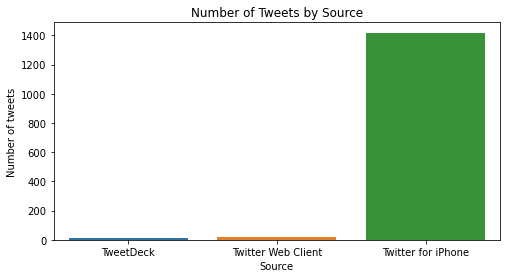

<Figure size 432x288 with 0 Axes>

In [ ]:
# plotting the number of tweets from the different sources
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data = Final_twitter_data.groupby("source").agg({"tweet_id":"count"}).reset_index(), x="source", y="tweet_id")
plt.title("Number of Tweets by Source")
plt.xlabel("Source")
plt.ylabel("Number of tweets")
plt.show()
plt.clf()

98% of the tweets were made using an iPhone, with tweets made from TweetDeck and Twitter Web Client accounting for just 2% of the tweets made

### What is the number of dogs per dog stage 

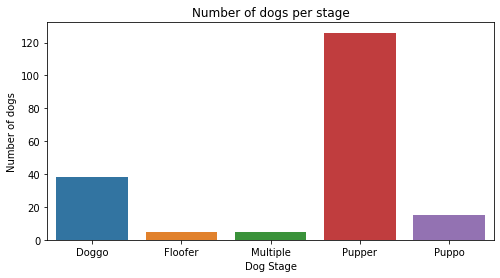

<Figure size 432x288 with 0 Axes>

In [ ]:
# plotting the number of dogs per dog stage excluding record wityh missimg values for dog stage
asdf = Final_twitter_data.groupby("dog_stage").agg({"tweet_id":"count"}).reset_index().sort_values("tweet_id", 
                                                                                                   ascending = False) 

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data = asdf, 
            x="dog_stage", y="tweet_id")
plt.title("Number of dogs per stage")
plt.xlabel("Dog Stage")
plt.ylabel("Number of dogs")
plt.show()
plt.clf()

Excluding records with missing values for dog stage, 66.7% of the dogs are in Pupper stage, 20.1% are in the doggo stage, 7.9% in the puppo Stage 

In [ ]:
# based on prediction 1 which of selecting the images that are doggs and non dogs
dogs_ = Final_twitter_data.query("p1_dog == True")
non_dogs_ = Final_twitter_data.query("p1_dog == False")

### What is the most popular type of dog

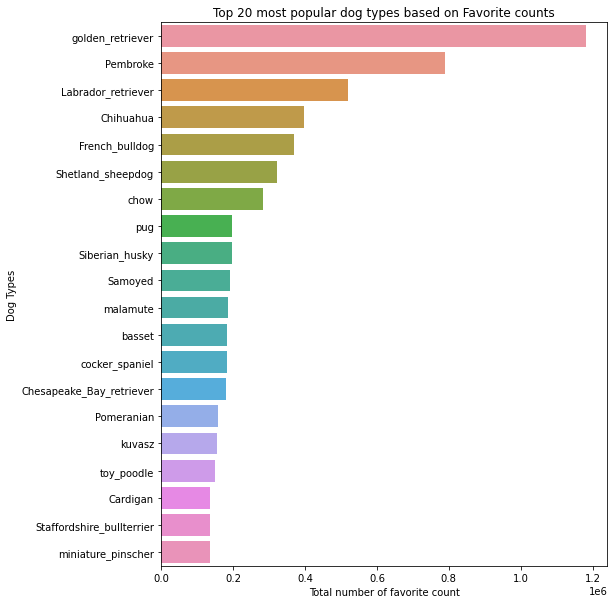

<Figure size 432x288 with 0 Axes>

In [ ]:
# making a plot of the most popular dog type based on Favourite counts
fig, ax = plt.subplots(figsize=(8,10))
sns.barplot(data = dogs_.groupby("p1").agg({"favorite_count":"sum"}).sort_values("favorite_count", ascending = False).reset_index().iloc[:20],\
            y="p1", x="favorite_count")
plt.title("Top 20 most popular dog types based on Favorite counts")
plt.xlabel("Total number of favorite count")
plt.ylabel("Dog Types")
plt.show()
plt.clf()

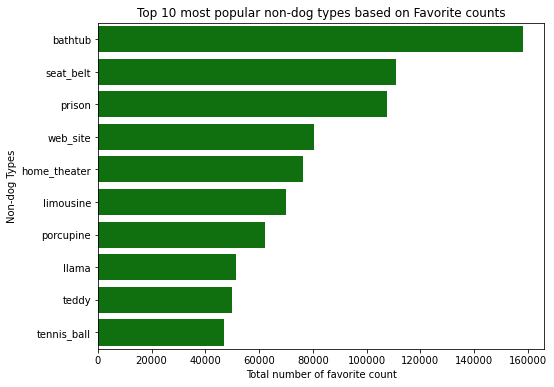

<Figure size 432x288 with 0 Axes>

In [ ]:
# making a plot of the most popular non-dog type based on Favourite counts
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data = non_dogs_.groupby("p1").agg({"favorite_count":"sum"}).sort_values("favorite_count", ascending = False).reset_index().iloc[:10],\
            y="p1", x="favorite_count",
           color = "green")
plt.title("Top 10 most popular non-dog types based on Favorite counts")
plt.xlabel("Total number of favorite count")
plt.ylabel("Non-dog Types")
plt.show()
plt.clf()

### What is relationship between number of retweets and favorite count

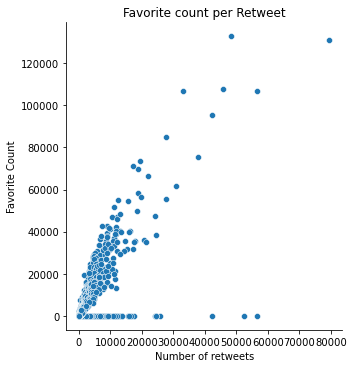

The linear correlation between Favorite count and number of retweets is 0.7327135093181447


<Figure size 432x288 with 0 Axes>

In [ ]:
sns.relplot(data = Final_twitter_data, x = "retweet_count", y="favorite_count", kind= "scatter")
plt.title("Favorite count per Retweet")
plt.xlabel("Number of retweets")
plt.ylabel("Favorite Count")
plt.show()
plt.clf()

print(f"The linear correlation between Favorite count and number of retweets is {Final_twitter_data['favorite_count'].corr(Final_twitter_data['retweet_count'])}")

### 